In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import ShuffleSplit

# Import supplementary visualizations code visuals.py
# import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data_train = pd.read_csv('Boston_Train.csv')
data_train
data_test=pd.read_csv('Boston_Test.csv')
# prices = data_train['MEDV']
# features = data_train.drop('MEDV', axis = 1)
    
# Success
# print("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

In [2]:
pip install cross_validation

ERROR: Could not find a version that satisfies the requirement cross_validation (from versions: none)
ERROR: No matching distribution found for cross_validation
Note: you may need to restart the kernel to use updated packages.


In [3]:
data_train = pd.read_csv('Boston_Test.csv')
data_train

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,351,0.07950,60,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,352,0.07244,60,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,353,0.01709,90,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,354,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,355,0.10659,80,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,501,0.06263,0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
151,502,0.04527,0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
152,503,0.06076,0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
153,504,0.10959,0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [5]:
features

NameError: name 'features' is not defined

In [6]:
data_train[:10]

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,351,0.07950,60,1.69,0,0.411,6.579,35.9,10.7103,4,411,18.3,370.78,5.49,24.1
1,352,0.07244,60,1.69,0,0.411,5.884,18.5,10.7103,4,411,18.3,392.33,7.79,18.6
2,353,0.01709,90,2.02,0,0.410,6.728,36.1,12.1265,5,187,17.0,384.46,4.50,30.1
3,354,0.04301,80,1.91,0,0.413,5.663,21.9,10.5857,4,334,22.0,382.80,8.05,18.2
4,355,0.10659,80,1.91,0,0.413,5.936,19.5,10.5857,4,334,22.0,376.04,5.57,20.6
5,356,8.98296,0,18.10,1,0.770,6.212,97.4,2.1222,24,666,20.2,377.73,17.60,17.8
6,357,3.84970,0,18.10,1,0.770,6.395,91.0,2.5052,24,666,20.2,391.34,13.27,21.7
7,358,5.20177,0,18.10,1,0.770,6.127,83.4,2.7227,24,666,20.2,395.43,11.48,22.7
8,359,4.26131,0,18.10,0,0.770,6.112,81.3,2.5091,24,666,20.2,390.74,12.67,22.6
9,360,4.54192,0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79,25.0


In [7]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  155 non-null    int64  
 1   crim        155 non-null    float64
 2   zn          155 non-null    int64  
 3   indus       155 non-null    float64
 4   chas        155 non-null    int64  
 5   nox         155 non-null    float64
 6   rm          155 non-null    float64
 7   age         155 non-null    float64
 8   dis         155 non-null    float64
 9   rad         155 non-null    int64  
 10  tax         155 non-null    int64  
 11  ptratio     155 non-null    float64
 12  black       155 non-null    float64
 13  lstat       155 non-null    float64
 14  medv        155 non-null    float64
dtypes: float64(10), int64(5)
memory usage: 18.3 KB


In [8]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  155 non-null    int64  
 1   crim        155 non-null    float64
 2   zn          155 non-null    int64  
 3   indus       155 non-null    float64
 4   chas        155 non-null    int64  
 5   nox         155 non-null    float64
 6   rm          155 non-null    float64
 7   age         155 non-null    float64
 8   dis         155 non-null    float64
 9   rad         155 non-null    int64  
 10  tax         155 non-null    int64  
 11  ptratio     155 non-null    float64
 12  black       155 non-null    float64
 13  lstat       155 non-null    float64
 14  medv        155 non-null    float64
dtypes: float64(10), int64(5)
memory usage: 18.3 KB


In [9]:
data_train['age']

0      35.9
1      18.5
2      36.1
3      21.9
4      19.5
       ... 
150    69.1
151    76.7
152    91.0
153    89.3
154    80.8
Name: age, Length: 155, dtype: float64

In [10]:
data_test.describe()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000,155.000000
mean,428.000000,10.886843,2.387097,17.253484,0.051613,0.654239,6.014555,86.140645,2.377864,21.045161,629.916129,20.149032,302.744258,17.737742,16.803871
std,44.888751,12.842318,13.294070,3.973223,0.221961,0.076748,0.687848,17.844278,1.678612,7.137192,107.071159,0.475281,139.254349,7.134484,8.186613
min,351.000000,0.017090,0.000000,1.690000,0.000000,0.410000,3.561000,18.500000,1.129600,1.000000,187.000000,17.000000,0.320000,2.960000,5.000000
25%,389.500000,4.385535,0.000000,18.100000,0.000000,0.591000,5.695000,81.900000,1.643250,24.000000,666.000000,20.200000,288.690000,13.335000,11.750000
50%,428.000000,7.839320,0.000000,18.100000,0.000000,0.679000,6.112000,92.600000,2.004800,24.000000,666.000000,20.200000,378.380000,17.270000,15.100000
75%,466.500000,13.441000,0.000000,18.100000,0.000000,0.713000,6.414000,98.250000,2.501600,24.000000,666.000000,20.200000,396.555000,21.945000,20.600000
max,505.000000,88.976200,90.000000,27.740000,1.000000,0.770000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<AxesSubplot:>

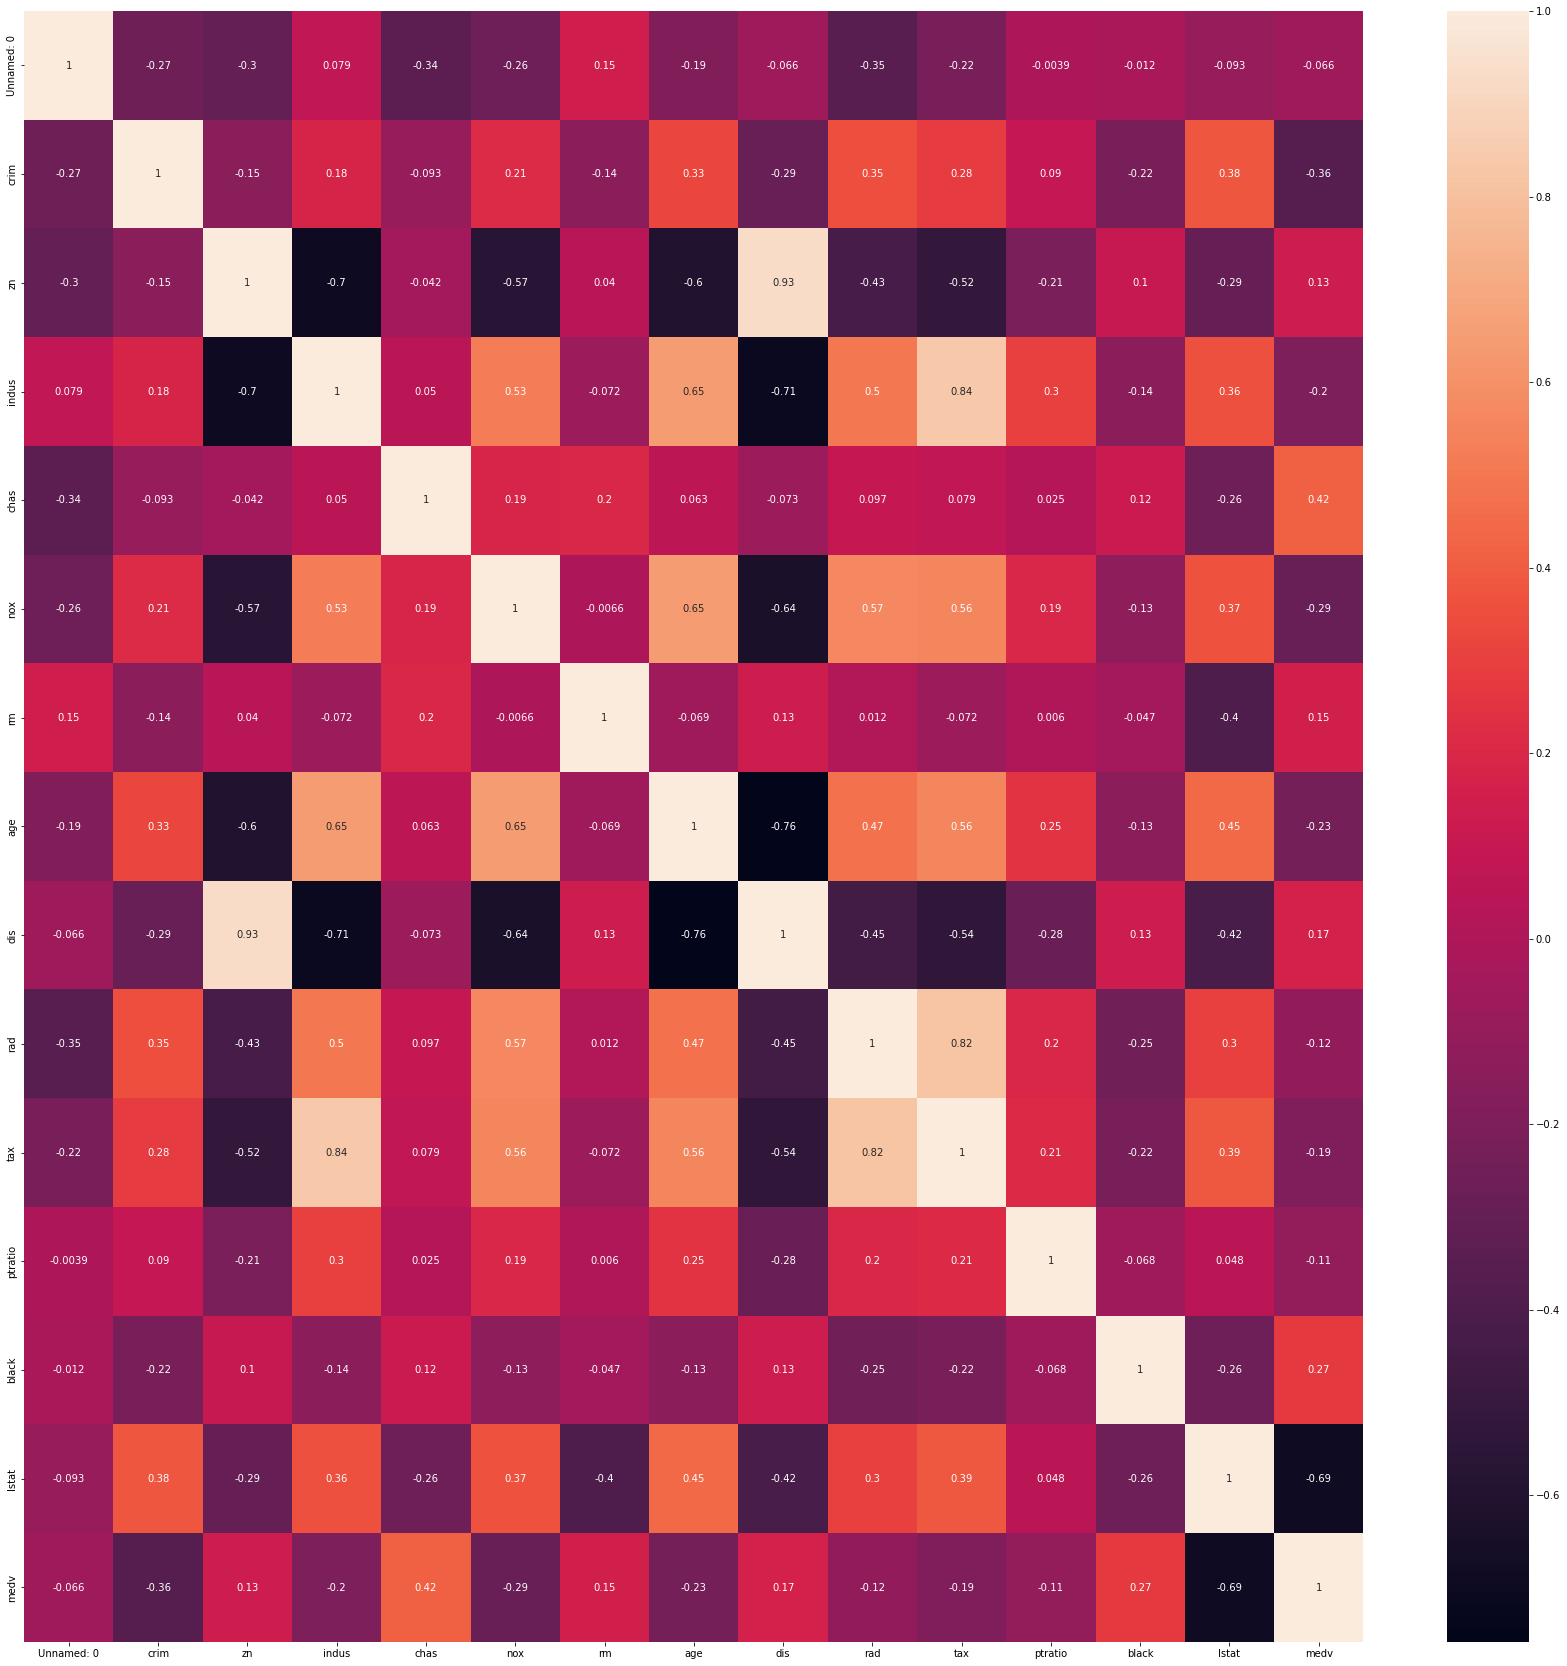

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
data=data_train.corr()
plt.figure(figsize=(30,30))
sns.heatmap(data,annot=True)

In [12]:
x=data_train.iloc[:,0:15]
x1=data_test.iloc[:,0:15]

In [13]:
y=data_train.iloc[:,14]
y1=data_test.iloc[:,14]

In [14]:
from sklearn.preprocessing import StandardScaler
independent_scaler=StandardScaler()
x=independent_scaler.fit_transform(x)
x1=independent_scaler.transform(x1)
x

array([[-1.7209121 , -0.84426932,  4.34777724, ...,  0.49015546,
        -1.72226103,  0.89411571],
       [-1.69856259, -0.84482084,  4.34777724, ...,  0.64540989,
        -1.39883812,  0.22010948],
       [-1.67621309, -0.84914478,  6.61173739, ...,  0.58871141,
        -1.86147351,  1.62939524],
       ...,
       [ 1.67621309, -0.84573328, -0.18014307, ...,  0.67833392,
        -1.70116824,  0.8696064 ],
       [ 1.69856259, -0.84191869, -0.18014307, ...,  0.6534788 ,
        -1.58304856,  0.63676788],
       [ 1.7209121 , -0.84677619, -0.18014307, ...,  0.67833392,
        -1.38618244, -0.60095265]])

In [15]:
from sklearn.decomposition import PCA
pc=PCA(n_components=2)
x=pc.fit_transform(x)
x1=pc.transform(x1)

In [17]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()
ln.fit(x,y)
predicted_y=ln.predict(x1)
print("predicted:",predicted_y)
print("real answer",y1)

predicted: [25.15232183 21.84094842 27.13652896 22.04306955 23.99643313 27.93724347
 31.44115582 31.74121266 21.85818219 24.36429582 20.47705113 20.36690306
 28.04688188 38.3224277  19.43568605 18.21979424 14.06302842 29.81662652
 42.5212462  43.42459747 29.8391733  38.99707078  9.09051213  5.87948659
 19.82048343 15.44144572 16.87126096 13.93030929 13.83895457  9.91154145
 15.1079167  13.14322626 13.21953439  6.16982906  8.49489321  8.22890354
  7.17675396  8.673228   13.81076533 16.75426158 19.50914342 10.79017626
 17.77237342 15.99705992 17.38534848 16.73575869 13.85563078  6.0238379
  9.9705284   9.69430643 13.86272773 15.71229379 11.40282443  7.4871401
  5.74001381  9.06206832 20.59696976 13.44201641 19.15458139 11.35074837
 14.26296095  5.97822788 11.27103861 -0.32387938  8.13306075 10.65827116
  7.66465883  4.69149353 12.21407109 17.98224557 16.70330116 17.7016607
 11.99325428 12.2713913   8.85407644 12.74151982 11.33866961 12.77674268
 11.25231585 14.87653991 14.81839571 17.629

In [18]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y1,predicted_y)


2.90926220657277